<a href="https://colab.research.google.com/github/musaers/pepe-repo/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter
import datetime
import os
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

- include dates on which it was listed on different crypto exchanges

In [7]:
# Google Drive'ı bağlayalım
drive.mount('/content/drive')


# In[3]:


# Veri setinin Drive'daki konumunu belirtelim
# NOT: Veri setinin Google Drive'a önceden yüklenmiş olması gerekiyor
file_path = '/content/drive/MyDrive/cs414_yeni/pepe-transfers.csv'

Mounted at /content/drive


In [11]:
pepe.head(20)

,block_number,timestamp,date,from_address,to_address,value_token,value_base,transaction_index,log_index,transaction_hash
0,17050363,1681536587,2023-04-15 07:29:47+00:00,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,6.044788e+11,604478780314562436526661163632,59,162,0xc321dac6609df6c3baf3512be31a967d93397a79c597...
1,17050354,1681536479,2023-04-15 07:27:59+00:00,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,1.311359e+11,131135861213042893154914604963,70,287,0xb745bfba489c1abe20a5fbc72a655fa5ba18ded2ce84...
2,17050352,1681536455,2023-04-15 07:27:35+00:00,0x4a5a7331da84d3834c030a9b8d4f3d687a3b788b,0x4a5a7331da84d3834c030a9b8d4f3d687a3b788b,3.717649e+11,371764915766751234543927965993,115,262,0x2036f8a047ca64006862e99049150f14ccacfb4e3a73...
3,17050352,1681536455,2023-04-15 07:27:35+00:00,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,3.717649e+11,371764915766751234543927965993,115,257,0x2036f8a047ca64006862e99049150f14ccacfb4e3a73...
4,17050350,1681536431,2023-04-15 07:27:11+00:00,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,7.920714e+10,79207141801681976718549271230,126,323,0x0ae21fcaf097b54cc2049777df2018e65822eea74709...
5,17050349,1681536419,2023-04-15 07:26:59+00:00,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,6.042910e+10,60429101207323875939744363999,66,123,0x5dbeceeb17804794e9747d3379667a27096a1e542f9d...
6,17050347,1681536395,2023-04-15 07:26:35+00:00,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,3.213917e+11,321391697836822350710300843853,19,54,0xf452ae4b3b59cae28c1bb6347ac307f7c2c59bf38658...
7,17050346,1681536383,2023-04-15 07:26:23+00:00,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,8.123551e+10,81235510208390985170543076881,87,184,0x9dc766ceab6fe560cdefb2f3572b117f1a1ab6f0f70b...
8,17050345,1681536371,2023-04-15 07:26:11+00:00,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,2.190778e+11,219077761378922152808707690792,97,175,0x419b101daf11ce55fb8adaac636673c57bfcfd9af571...
9,17050344,1681536359,2023-04-15 07:25:59+00:00,0x7046e110c7408bcec7ebcd5441a7ac01a31b2ff6,0x7046e110c7408bcec7ebcd5441a7ac01a31b2ff6,1.897875e+11,189787542904665034507522588090,42,116,0x73580dade9477cb5645eddb19a5d8504e7a9618e56a3...


Data dimensions: (800955, 10)

Columns: ['block_number', 'timestamp', 'date', 'from_address', 'to_address', 'value_token', 'value_base', 'transaction_index', 'log_index', 'transaction_hash']

First few rows:


,block_number,timestamp,date,from_address,to_address,value_token,value_base,transaction_index,log_index,transaction_hash
0,17050363,1681536587,2023-04-15 07:29:47+00:00,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,6.044788e+11,604478780314562436526661163632,59,162,0xc321dac6609df6c3baf3512be31a967d93397a79c597...
1,17050354,1681536479,2023-04-15 07:27:59+00:00,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,1.311359e+11,131135861213042893154914604963,70,287,0xb745bfba489c1abe20a5fbc72a655fa5ba18ded2ce84...
2,17050352,1681536455,2023-04-15 07:27:35+00:00,0x4a5a7331da84d3834c030a9b8d4f3d687a3b788b,0x4a5a7331da84d3834c030a9b8d4f3d687a3b788b,3.717649e+11,371764915766751234543927965993,115,262,0x2036f8a047ca64006862e99049150f14ccacfb4e3a73...
3,17050352,1681536455,2023-04-15 07:27:35+00:00,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,3.717649e+11,371764915766751234543927965993,115,257,0x2036f8a047ca64006862e99049150f14ccacfb4e3a73...
4,17050350,1681536431,2023-04-15 07:27:11+00:00,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,7.920714e+10,79207141801681976718549271230,126,323,0x0ae21fcaf097b54cc2049777df2018e65822eea74709...



Missing values per column:
block_number         0
timestamp            0
date                 0
from_address         0
to_address           0
value_token          0
value_base           0
transaction_index    0
log_index            0
transaction_hash     0
dtype: int64

Data types:
block_number                       int64
timestamp                          int64
date                 datetime64[ns, UTC]
from_address                      object
to_address                        object
value_token                      float64
value_base                        object
transaction_index                  int64
log_index                          int64
transaction_hash                  object
dtype: object

Number of unique addresses (senders + receivers): 88821
Number of unique senders: 88821
Number of unique receivers: 88821
Total tokens transferred: 1.06e+16
Average transfer value: 1.32e+10
Median transfer value: 8.59e+08

Number of self-transfers (to be considered carefully): 800955

Top 1

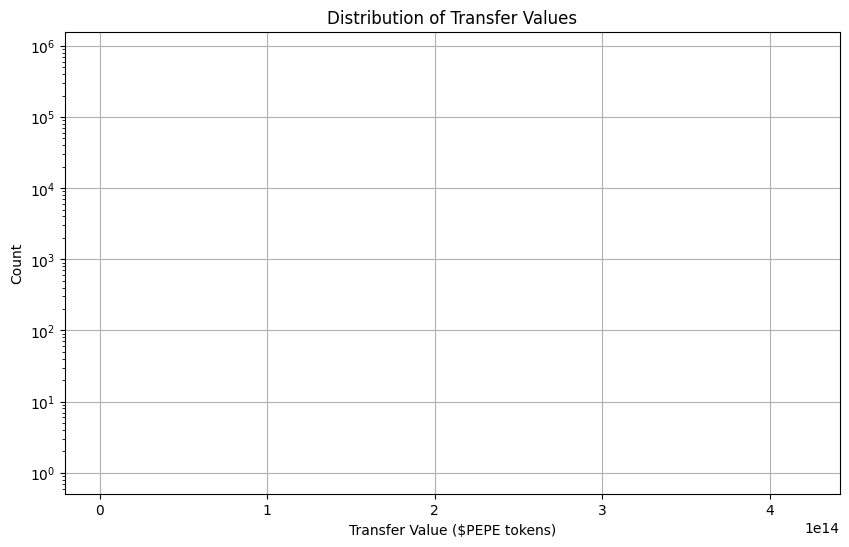

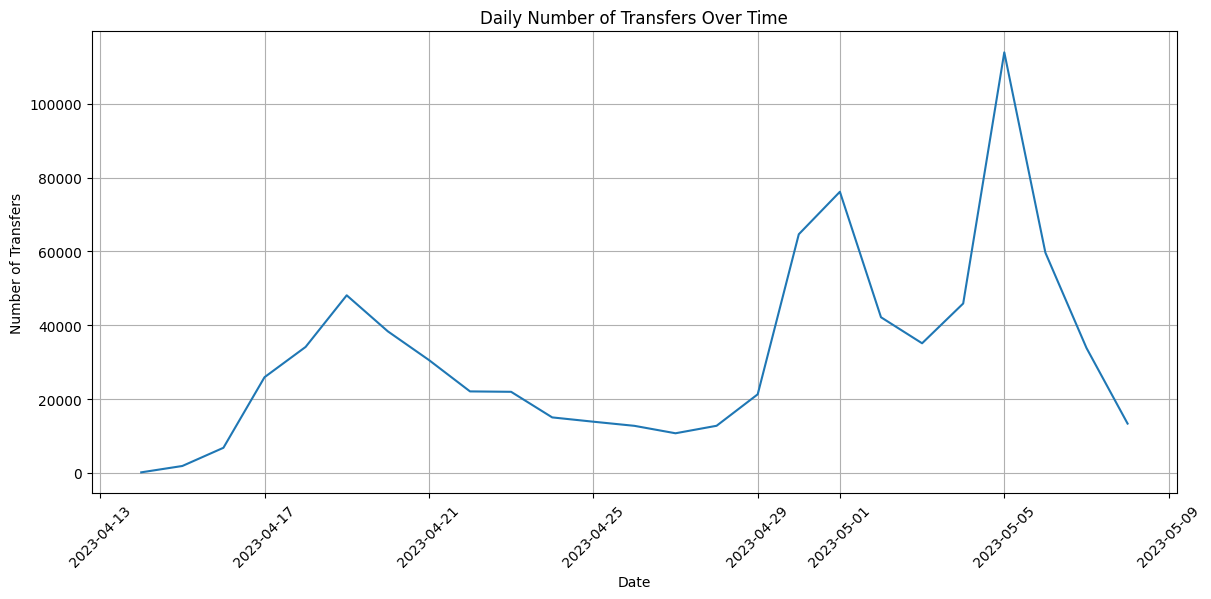

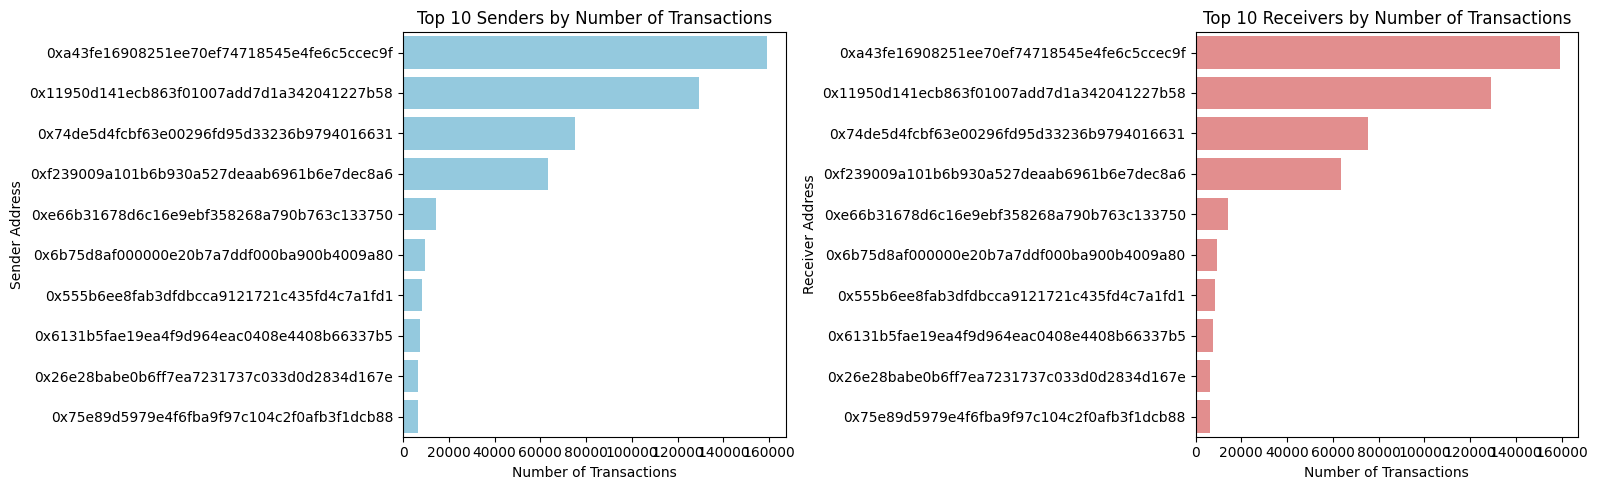

In [12]:
# 📂 Load dataset
pepe = pd.read_csv(file_path)  # Adjust path if needed

# 📊 Basic Overview
print("Data dimensions:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
display(df.head())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

# 🎯 Core Metrics
n_unique_addresses = len(set(df['from_address']).union(set(df['to_address'])))
n_senders = df['from_address'].nunique()
n_receivers = df['to_address'].nunique()
total_transfers = df['value_token'].sum()
average_transfer_value = df['value_token'].mean()
median_transfer_value = df['value_token'].median()

print(f"\nNumber of unique addresses (senders + receivers): {n_unique_addresses}")
print(f"Number of unique senders: {n_senders}")
print(f"Number of unique receivers: {n_receivers}")
print(f"Total tokens transferred: {total_transfers:.2e}")
print(f"Average transfer value: {average_transfer_value:.2e}")
print(f"Median transfer value: {median_transfer_value:.2e}")

# 🧹 Cleaning - Remove self-transfers
self_transfers = df[df['from_address'] == df['to_address']]
print(f"\nNumber of self-transfers (to be considered carefully): {self_transfers.shape[0]}")

# 🎯 Top Senders and Receivers
top_senders = df['from_address'].value_counts().head(10)
top_receivers = df['to_address'].value_counts().head(10)

print("\nTop 10 senders (by number of transactions):")
print(top_senders)

print("\nTop 10 receivers (by number of transactions):")
print(top_receivers)

# 📈 Visualization Section

## Distribution of Transfer Values
plt.figure(figsize=(10, 6))
sns.histplot(df['value_token'], bins=100, log_scale=(False, True), color="dodgerblue")
plt.xlabel('Transfer Value ($PEPE tokens)')
plt.title('Distribution of Transfer Values')
plt.grid(True)
plt.show()

## Number of Transfers over Time
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14, 6))
df['date'].dt.date.value_counts().sort_index().plot()
plt.xlabel('Date')
plt.ylabel('Number of Transfers')
plt.title('Daily Number of Transfers Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Top Senders and Receivers Bar Plot
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

sns.barplot(x=top_senders.values, y=top_senders.index, ax=ax[0], color='skyblue')
ax[0].set_title('Top 10 Senders by Number of Transactions')
ax[0].set_xlabel('Number of Transactions')
ax[0].set_ylabel('Sender Address')

sns.barplot(x=top_receivers.values, y=top_receivers.index, ax=ax[1], color='lightcoral')
ax[1].set_title('Top 10 Receivers by Number of Transactions')
ax[1].set_xlabel('Number of Transactions')
ax[1].set_ylabel('Receiver Address')

plt.tight_layout()
plt.show()


In [10]:
pepe.min()

,0
block_number,17046105
timestamp,1681483895
date,2023-04-14 16:51:35+00:00
from_address,0x0000000000000000000000000000000000000000
to_address,0x0000000000000000000000000000000000000000
value_token,0.0
value_base,0
transaction_index,0
log_index,0
transaction_hash,0x00000f51e2439e9ee468e602bc5ebb84a7f0111e11c2...


In [13]:
pepe['date'] = pd.to_datetime(pepe['date'])
pepe['timestamp'] = pd.to_datetime(pepe['timestamp'], unit='s')
pepe.drop(columns=['date', 'value_base'], inplace=True)


In [14]:
pepe.head()

,block_number,timestamp,from_address,to_address,value_token,transaction_index,log_index,transaction_hash
0,17050363,2023-04-15 05:29:47,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,6.044788e+11,59,162,0xc321dac6609df6c3baf3512be31a967d93397a79c597...
1,17050354,2023-04-15 05:27:59,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,1.311359e+11,70,287,0xb745bfba489c1abe20a5fbc72a655fa5ba18ded2ce84...
2,17050352,2023-04-15 05:27:35,0x4a5a7331da84d3834c030a9b8d4f3d687a3b788b,0x4a5a7331da84d3834c030a9b8d4f3d687a3b788b,3.717649e+11,115,262,0x2036f8a047ca64006862e99049150f14ccacfb4e3a73...
3,17050352,2023-04-15 05:27:35,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,3.717649e+11,115,257,0x2036f8a047ca64006862e99049150f14ccacfb4e3a73...
4,17050350,2023-04-15 05:27:11,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,7.920714e+10,126,323,0x0ae21fcaf097b54cc2049777df2018e65822eea74709...


In [15]:
import requests
import pandas as pd
from datetime import datetime

# Define token + pool
pepe_token = "0x6982508145454ce325ddbe47a25d4ec3d2311933"
pepe_pool = "0xa43fe16908251ee70ef74718545e4fe6c5ccec9f"

# Time range
from_ts = int(pd.Timestamp("2023-04-15").timestamp())
to_ts = int(pd.Timestamp("2023-05-08").timestamp())

# Request
url = "https://api.syve.ai/v1/price/historical/tick"

params = {
    "token_address": pepe_token,
    "pool_address": pepe_pool,
    "from_timestamp": from_ts,
    "until_timestamp": to_ts,
    "size": 100000
}

response = requests.get(url, params=params)

if response.status_code == 200:
    tick_data = pd.DataFrame(response.json()['data'])
    tick_data['timestamp'] = pd.to_datetime(tick_data['timestamp'], unit='s')
    print(tick_data.head())
else:
    print(f"Error: {response.status_code}\n{response.text}")


   block_number           timestamp  \
0      17212079 2023-05-07 23:59:59   
1      17212079 2023-05-07 23:59:59   
2      17212076 2023-05-07 23:59:23   
3      17212073 2023-05-07 23:58:47   
4      17212072 2023-05-07 23:58:35   

                                    transaction_hash  price_usd  amount_token  
0  0xe4379cf161a7d652d4a1b58b6f38f6a5c4a3a25a5e45...   0.000003  3.623069e+08  
1  0xc780755764dc5db8251cb2217941072549a0bb3b1268...   0.000003  2.635649e+08  
2  0x92fb2bfafab25438e84fe94db32be3f624770a9846a6...   0.000003  6.590029e+07  
3  0xe2e7bb8d2cd40506678b60ce8b965fa01d6e4b82e043...   0.000003  1.295379e+09  
4  0xdcb66218c5e99156f7ece0ed4e08dd79b8d0e053df13...   0.000003  4.432937e+08  


In [16]:
tick_data.to_pickle("pepe_usd_data.pkl")
print("Daten gespeichert in 'tick_data.pkl'")

Daten gespeichert in 'tick_data.pkl'


In [17]:
tick_data.sample(5)

,block_number,timestamp,transaction_hash,price_usd,amount_token
98634,17164123,2023-05-01 06:12:47,0x4486be273fbd5da914f37a56ea28e0f452e68770f589...,0.000001,2.293526e+09
93502,17165401,2023-05-01 10:31:23,0x783f007e73c0f95a50415a76450b0ada2a783cd88bb8...,0.000001,7.608412e+09
55680,17187960,2023-05-04 14:40:59,0x772f0ffb0b5d75273410abd0391c74b7fdb24e2e4c95...,0.000002,1.153517e+08
4732,17207030,2023-05-07 06:56:59,0xb9335aaa54ee7c85eb05ed0c8da6b57c6a7a5f7e8a9f...,0.000003,1.295664e+08
20213,17198014,2023-05-06 00:31:35,0xa634058baaff6b2ffe3159aa319c371b31554644bbfb...,0.000004,2.584871e+08


Shape: (100000, 5)
Columns: ['block_number', 'timestamp', 'transaction_hash', 'price_usd', 'amount_token']


,block_number,timestamp,transaction_hash,price_usd,amount_token
0,17212079,2023-05-07 23:59:59,0xe4379cf161a7d652d4a1b58b6f38f6a5c4a3a25a5e45...,0.000003,3.623069e+08
1,17212079,2023-05-07 23:59:59,0xc780755764dc5db8251cb2217941072549a0bb3b1268...,0.000003,2.635649e+08
2,17212076,2023-05-07 23:59:23,0x92fb2bfafab25438e84fe94db32be3f624770a9846a6...,0.000003,6.590029e+07
3,17212073,2023-05-07 23:58:47,0xe2e7bb8d2cd40506678b60ce8b965fa01d6e4b82e043...,0.000003,1.295379e+09
4,17212072,2023-05-07 23:58:35,0xdcb66218c5e99156f7ece0ed4e08dd79b8d0e053df13...,0.000003,4.432937e+08


Date range: 2023-05-01 05:15:23 → 2023-05-07 23:59:59

Price USD stats:
count    9.986000e+04
mean     2.066176e-06
std      9.354550e-07
min      7.608490e-07
25%      1.188240e-06
50%      1.908386e-06
75%      2.867708e-06
max      4.815338e-06
Name: price_usd, dtype: float64

Token amount stats:
count    1.000000e+05
mean     3.997278e+09
std      1.223437e+10
min      4.000000e-10
25%      1.380515e+08
50%      5.958074e+08
75%      4.000000e+09
max      3.762584e+11
Name: amount_token, dtype: float64

Unique price count: 99841


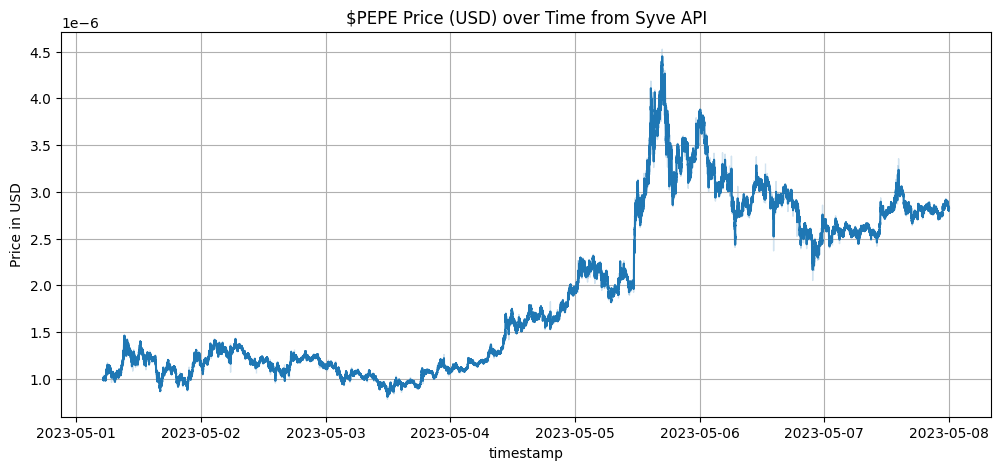

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Syve tick price data (adjust filename as needed)
tick = tick_data

# Check structure and basic info
print("Shape:", tick.shape)
print("Columns:", tick.columns.tolist())
display(tick.head())

# Convert timestamp to datetime
tick['timestamp'] = pd.to_datetime(tick['timestamp'], unit='s')

# Check min/max timestamp
print("Date range:", tick['timestamp'].min(), "→", tick['timestamp'].max())

# Summary stats for price and amount
print("\nPrice USD stats:")
print(tick['price_usd'].describe())

print("\nToken amount stats:")
print(tick['amount_token'].describe())

# Check if prices are all identical (should not be)
print("\nUnique price count:", tick['price_usd'].nunique())

# Visual check: price over time
plt.figure(figsize=(12, 5))
sns.lineplot(data=tick, x='timestamp', y='price_usd')
plt.title('$PEPE Price (USD) over Time from Syve API')
plt.ylabel('Price in USD')
plt.grid(True)
plt.show()
